In [1]:
# Importamos bibliotecas
import numpy as np
import numpy.random as random
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Cargamos el dataset y realizamos una auditoría básica
letras_mnist = pd.read_csv("sign_mnist_train.csv")

# Ordenamos las imágenes por la letra a la que corresponden en orden ascendente
letras_mnist = letras_mnist.sort_values('label', ascending=True)

# Corroboramos la cantidad de imágenes que tenemos por letra
print(letras_mnist.groupby('label')['label'].value_counts(ascending=True))

label
0     1126
1     1010
2     1144
3     1196
4      957
5     1204
6     1090
7     1013
8     1162
10    1114
11    1241
12    1055
13    1151
14    1196
15    1088
16    1279
17    1294
18    1199
19    1186
20    1161
21    1082
22    1225
23    1164
24    1118
Name: count, dtype: int64


In [3]:
# Generamos un diccionario que contenga, para cada clase de letra, la cantidad de imágenes de ella que se encuentran en el dataset

letras = pd.read_csv('sign_mnist_train.csv')

# Auditoría: cantidad de imágenes por cada clase de letra
letras = letras.sort_values('label', ascending = True)
print(print(letras.groupby('label')['label'].value_counts(ascending=True)))

# Reflejamos lo de arriba en un diccionario (forma naive) para tener a mano está información de forma más cómoda
cant_por_clase = {i: 0 for i in range(25)}

for i in range(0, len(letras.index)):
  cant_por_clase[letras.loc[i]['label']] += 1

print(cant_por_clase)

label
0     1126
1     1010
2     1144
3     1196
4      957
5     1204
6     1090
7     1013
8     1162
10    1114
11    1241
12    1055
13    1151
14    1196
15    1088
16    1279
17    1294
18    1199
19    1186
20    1161
21    1082
22    1225
23    1164
24    1118
Name: count, dtype: int64
None
{0: 1126, 1: 1010, 2: 1144, 3: 1196, 4: 957, 5: 1204, 6: 1090, 7: 1013, 8: 1162, 9: 0, 10: 1114, 11: 1241, 12: 1055, 13: 1151, 14: 1196, 15: 1088, 16: 1279, 17: 1294, 18: 1199, 19: 1186, 20: 1161, 21: 1082, 22: 1225, 23: 1164, 24: 1118}


In [4]:
# Análisis exploratorio para Ejercicios 1-a 1-b y 1-c

mnist = pd.read_csv("sign_mnist_train.csv").sort_values('label')

# Generamos las varianzas de las escalas de grises de las imágenes pertenecientes a las clases de la E, la L y la M
varianzas_por_clase = [] # Para usar como referencia al comparar clases de imágenes entre sí
promedios_por_clase = [] # Para usar como referencia al comparar imágenes de una misma clase
desvios_por_clase = [] # Para usar como referencia al comparar clases de imágenes entre sí (alternativa a varianza)

for i in range(0, 24):
  # La varianza significativa de los pixels qe buscamos es a partir del pixel 1
  var_clase_i = np.var(mnist[mnist['label'] == i][1:], axis=0).values[1:]
  desvio_clase_i = np.std(mnist[mnist['label'] == i][1:], axis=0).values[1:]
  avg_clase_i = np.mean(mnist[mnist['label'] == i][1:], axis=0).values[1:]
  varianzas_por_clase.append(var_clase_i)
  promedios_por_clase.append(avg_clase_i)
  desvios_por_clase.append(desvio_clase_i)

# Obs: varianzas_por_clase[9] está vacía dado que que no hay imágenes correspondientes a la letra J, al igual que ocurre con la letra Z

In [5]:
# Varianzas entre todas las clases de imágenes para ejercicio 1-a

# Creamos un DataFrame que contiene 100 imágenes de cada clase: imagenes_clases

# Le cargamos 100 imágenes correspondientes a la letra A (inicialización)
imagenes_clases = mnist[0:100]
letra = 1
offset = cant_por_clase[0]

# print(print(mnist.groupby('label')['label'].value_counts(ascending=True)))

while offset < len(mnist.index):
  if letra != 9:
    imagenes_clases = pd.concat([imagenes_clases, mnist[offset:offset+100]], axis=0)
    offset += cant_por_clase[letra]
  letra += 1

    ## Matriz de varianzas de imagenes_clases

var_imagenes_total = np.var(imagenes_clases, axis=0).values[1:]
print(var_imagenes_total.reshape(28,28))

[[1705.01891649 1565.52106094 1513.82581597 1518.37943333 1418.77978733
  1326.68982708 1237.39363264 1174.72923333 1124.6186     1005.47224149
   965.09324375  956.74133177  952.63777344  899.8524026   835.49872066
   784.73874931  777.99466649  744.47255399  726.89567708  729.34854931
   749.54791233  794.76359375  883.54988264  966.93632483 1038.25315556
  1167.5559151  1266.67604844 1315.59551649]
 [1723.08416667 1570.35395556 1542.37472066 1526.74362483 1424.72482222
  1343.128775   1247.44121597 1192.10902344 1128.98208316 1030.3554151
   983.92782222  984.46998264  990.20913264  929.92713733  888.19929149
   847.82303056  831.89091597  789.03612222  779.02324149  760.40999931
   774.79094167  820.49324931  877.71722222  978.56998264 1043.32506094
  1173.85056233 1231.88761649 1293.45705399]
 [1737.91036094 1576.35793333 1565.62715556 1536.24037483 1444.97189427
  1376.5898526  1285.0324151  1207.71139566 1160.9038151  1103.53593316
  1025.0253776  1026.33417899 1103.73638264 104

Text(0, 0.5, 'Varianza')

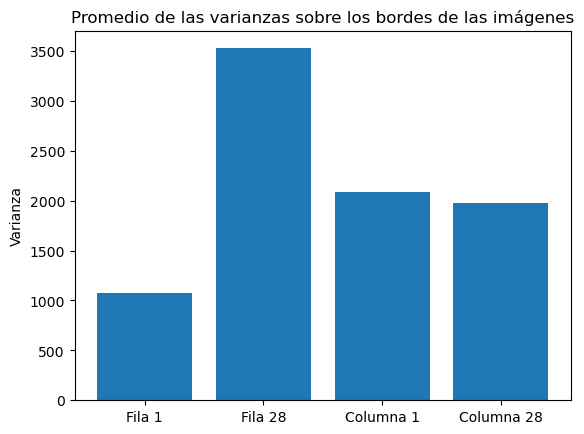

In [6]:
#Visualización para 1-a
var_imagenes_total = var_imagenes_total.reshape(28,28)

#Calculamos el promedio de la varianza de c/ píxel que está sobre la primera o última fila, o primera o última columna
prom_fila1 = np.mean(var_imagenes_total[0, :])
prom_ultimafila = np.mean(var_imagenes_total[27, :])
prom_columna1 = np.mean(var_imagenes_total[:, 0])
prom_ultimacolumna = np.mean(var_imagenes_total[:, 27])

#Graficamos los resultados obtenidos
fig, ax = plt.subplots()

ax.bar(x=['Fila 1', 'Fila 28', 'Columna 1', 'Columna 28'],
       height=[prom_fila1, prom_ultimafila, prom_columna1, prom_ultimacolumna])

ax.set_title('Promedio de las varianzas sobre los bordes de las imágenes')
ax.set_ylabel('Varianza', fontsize='medium')

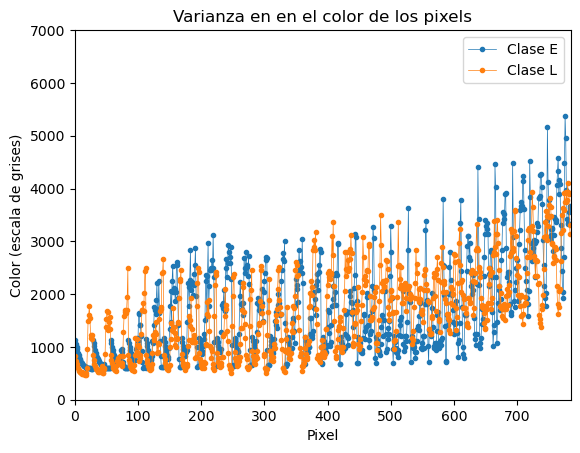

In [7]:
# Visualización para 1-b: Line plots para comparar clases de letras

# La idea es poder pensar cada imagen del dataset como una función F con dominio y codominio acotado:
# F: 28x28 -> [0...255], es decir a cada pixel entre 1 y 784 le asigna un valor entre 0 y 255 que
# corresponde a la tonalidad en escala de grises que presenta ese pixel en una imágen dada
# F : X -> Y_<Letra> (varianzas_por_clase[<nroClaseLetra>])

X = list(range(1, 785))

# Para el 1b utilizamos las clases E: 4, L: 11 y M: 12
Y_E = varianzas_por_clase[4]
Y_L = varianzas_por_clase[11]
Y_M = varianzas_por_clase[12]


F_E = {'X': X, 'Y': Y_E}
F_E_DataFrame = pd.DataFrame(F_E)

F_L = {'X': X, 'Y': Y_L}
F_L_DataFrame = pd.DataFrame(F_L)

F_M = {'X': X, 'Y': Y_M}
F_M_DataFrame = pd.DataFrame(F_M)


# Primer gráfico: Clases que NO se suponen similares

fig, ax = plt.subplots()

plt.rcParams['font.family'] = 'sans-serif'

# Grafica la clase E
ax.plot('X', 'Y', data=F_E_DataFrame,
        marker='.',                             # Tipo de punto (redondo, triángulo, cuadrado, etc.)
        linestyle='-',                          # Tipo de linea (solida, punteada, etc.)
        linewidth=0.5,                          # Ancho de linea
        label='Clase E',                        # Etiqueta que va a mostrar en la leyenda
        )

# Grafica la clase L
ax.plot('X', 'Y', data=F_L_DataFrame,
        marker='.',                             # Tipo de punto (redondo, triángulo, cuadrado, etc.)
        linestyle='-',                          # Tipo de linea (solida, punteada, etc.)
        linewidth=0.5,                          # Ancho de linea
        label='Clase L'                         # Etiqueta que va a mostrar en la leyenda
        )

# Agrega titulo, etiquetas a los ejes y limita el rango de valores de los ejes
ax.set_title('Varianza en en el color de los pixels')
ax.set_xlabel('Pixel', fontsize='medium')
ax.set_ylabel('Color (escala de grises)', fontsize='medium')
ax.set_xlim(0, 785)
ax.set_ylim(0, 7000)

# Muestra la leyenda
ax.legend()

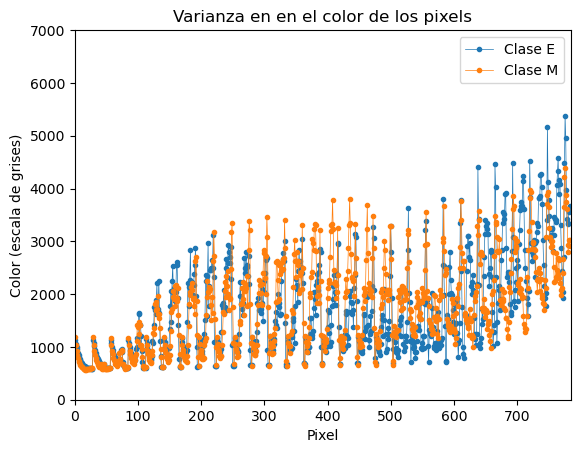

In [8]:
# Segundo gráfico: Clases que SÍ se suponen similares

fig, ax = plt.subplots()

plt.rcParams['font.family'] = 'sans-serif'

# Grafica la clase E
ax.plot('X', 'Y', data=F_E_DataFrame,
        marker='.',                             # Tipo de punto (redondo, triángulo, cuadrado, etc.)
        linestyle='-',                          # Tipo de linea (solida, punteada, etc.)
        linewidth=0.5,                          # Ancho de linea
        label='Clase E',                        # Etiqueta que va a mostrar en la leyenda
        )

# Grafica la clase M
ax.plot('X', 'Y', data=F_M_DataFrame,
        marker='.',                             # Tipo de punto (redondo, triángulo, cuadrado, etc.)
        linestyle='-',                          # Tipo de linea (solida, punteada, etc.)
        linewidth=0.5,                          # Ancho de linea
        label='Clase M'                         # Etiqueta que va a mostrar en la leyenda
        )

# Agrega titulo, etiquetas a los ejes y limita el rango de valores de los ejes
ax.set_title('Varianza en en el color de los pixels')
ax.set_xlabel('Pixel', fontsize='medium')
ax.set_ylabel('Color (escala de grises)', fontsize='medium')
ax.set_xlim(0, 785)
ax.set_ylim(0, 7000)

# Muestra la leyenda
ax.legend()

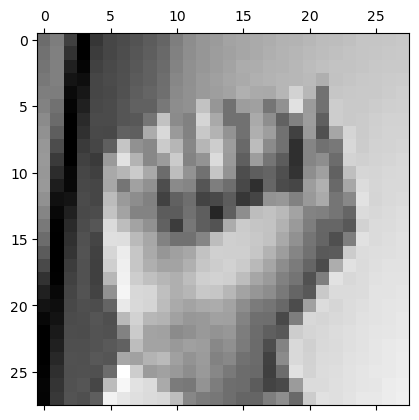

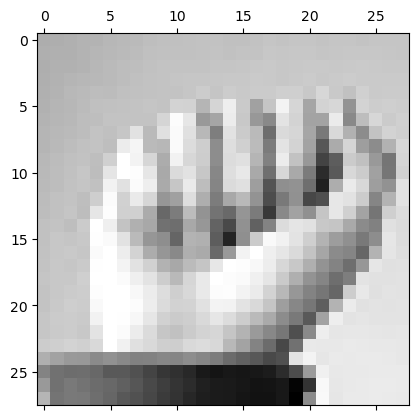

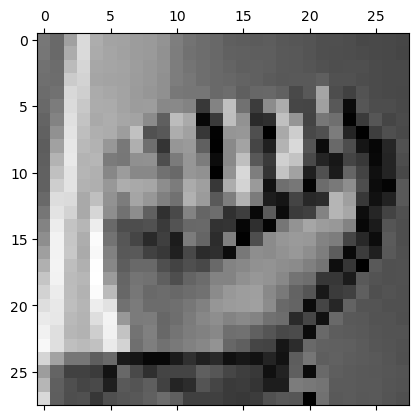

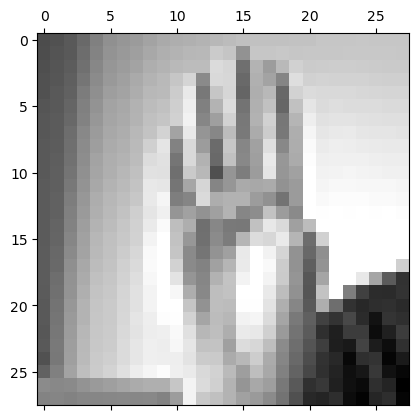

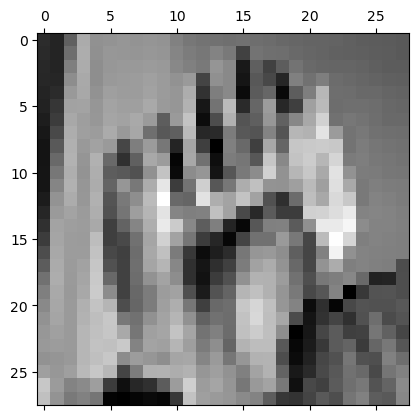

In [9]:
# Métrica para 1-c: Diferencia en valor absoluto entre dos imagenes

## Un ejemplo de uso a modo ilustrativo

imagen1 = imagenes_clases.iloc[0][1:].values
imagen2 = imagenes_clases.iloc[1][1:].values

plt.matshow(imagen1.reshape(28, 28), cmap = "gray")
plt.matshow(imagen2.reshape(28, 28), cmap = "gray")

# Diferencia con una imágen de una misma clase
mod_diferencia = np.absolute(np.subtract(imagen1, imagen2))
plt.matshow(mod_diferencia.reshape(28, 28), cmap = "gray")

# Imágen de otra clase distinta
imagen101 = imagenes_clases.iloc[100][1:].values

# Diferencia con una imágen de distinta clase
plt.matshow(imagen101.reshape(28, 28), cmap = "gray")

mod_diferencia2 = np.absolute(np.subtract(imagen1, imagen101))
plt.matshow(mod_diferencia2.reshape(28, 28), cmap = "gray")

[[29.33805728 27.36899966 25.40468587 24.00364793 22.87877029 22.03422092
  21.38459703 20.8868202  20.42713553 20.03735492 19.75174825 19.43315576
  18.9080493  18.86103311 18.68483518 18.28431116 18.20872336 18.07334551
  17.99757111 18.02026167 17.90320528 17.79869715 18.86884441 24.3818477
  29.92884248 32.92562129 39.13168634 38.96710671]
 [29.3770098  27.46634348 25.65258582 24.16472799 22.98928718 22.10842832
  21.42692675 20.87238451 20.4707967  20.04535436 19.8816741  19.22476201
  18.98735538 19.32447277 19.08569875 19.7363306  19.68642053 19.25856766
  18.74646449 18.18239711 18.40740231 18.35133207 18.6185928  23.61652259
  28.40445873 33.25220252 40.31757765 39.95452251]
 [29.38244269 27.54957739 25.78534665 24.30253856 23.18893279 22.35217025
  21.60081585 20.91924545 20.44851605 20.24637349 19.76848512 19.90709258
  21.76194639 21.2681991  22.94350914 27.63530673 26.77373906 22.98173054
  25.32911795 24.68473499 22.14985867 20.45168141 18.94313976 21.83911572
  27.854979

(0.0, 255.0)

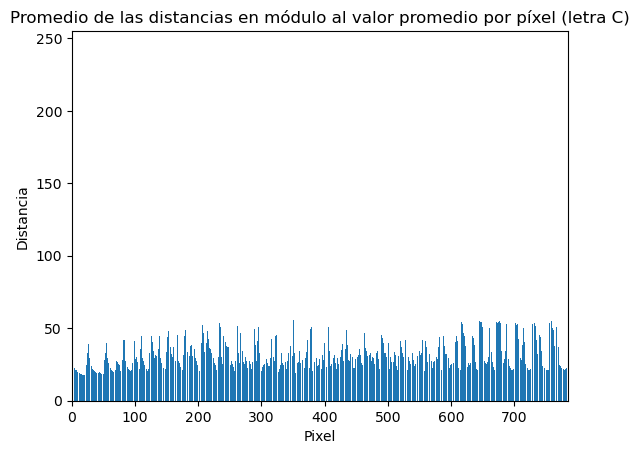

In [10]:
#%% Inciso 1-c

# Tomamos la matriz de promedios de la letra c
imagenes_clase_c = mnist[mnist['label'] == 2]

promedios_letra_c = np.mean(imagenes_clase_c[1:], axis=0).values[1:]
# print(promedios_letra_c)
# plt.matshow(promedios_letra_c.reshape(28, 28), cmap = "gray")

# Tomamos cada imágen cuya letra representada pertenezca a la clase de C
# Calculamos la diferencia en valor absoluto entre cada una de estas imagenes el promedio,
# Sumamos todas estás diferencias, y luego las dividimos por la cantidad de imágenes de la clase C

suma_difs_abs = np.zeros(784)

for index , row in imagenes_clase_c.iterrows():
  dif_abs_i = np.absolute(np.subtract(row[1:].values, promedios_letra_c))
  suma_difs_abs += dif_abs_i

suma_difs_abs /= cant_por_clase[2]

print(suma_difs_abs.reshape(28,28))
# plt.matshow(suma_difs_abs.reshape(28, 28), cmap = "gray")

# Visualización
# Plot píxel vs distancia promedio en módulo del valor de una imagen en ese píxel, al promedio de los valores en ese píxel
# (para imágenes de la letra C)

fig, ax = plt.subplots()
ax.bar(x=[i for i in range(784)],
       height=suma_difs_abs)

ax.set_title('Promedio de las distancias en módulo al valor promedio por píxel (letra C)')
ax.set_xlabel('Pixel', fontsize='medium')
ax.set_ylabel('Distancia', fontsize='medium')
ax.set_xlim(0, 785)
ax.set_ylim(0, 255)

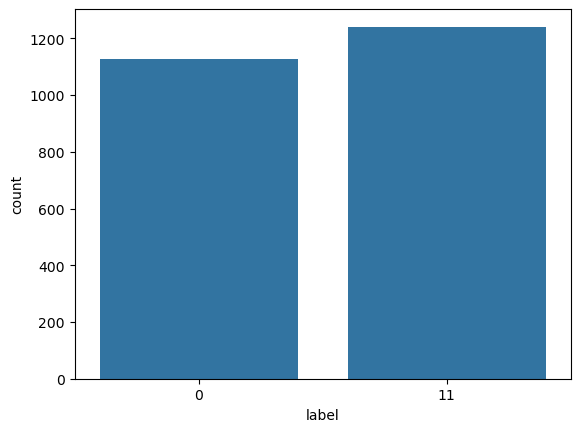

In [11]:
#%% EJERCICIO 2 - cargamos, analizamos y separamos los datos (incisos a, b y c)

# Cargamos los datos y ordenamos las fotos según su letra
letras = pd.read_csv('sign_mnist_train.csv')

letras = letras.sort_values('label', ascending = True)

# Creamos un df nuevo que tiene solo las fotos que corresponden a la A y a la L
letras_ej2 = letras.query('label == 0 or label == 11')

# Analizamos si la distribución de clases es similar
letras_ej2['label'].value_counts()
distribucion = sns.countplot(x = 'label', data = letras_ej2)

# Armamos el conjunto de desarrollo y el de evaluación
# Separamos una quinta parte de las muestras para la evaluación
letras_ej2 = letras_ej2.values
X = letras_ej2[ : ,1:]
Y = letras_ej2[ : , 0]
X_dev, X_eval, Y_dev, Y_eval = train_test_split(X, Y, test_size = 0.20, random_state=42)

# Ahora separamos los datos de desarrollo en train y test
X_train, X_test, Y_train, Y_test = train_test_split(X_dev, Y_dev, test_size = 0.20, random_state=101)

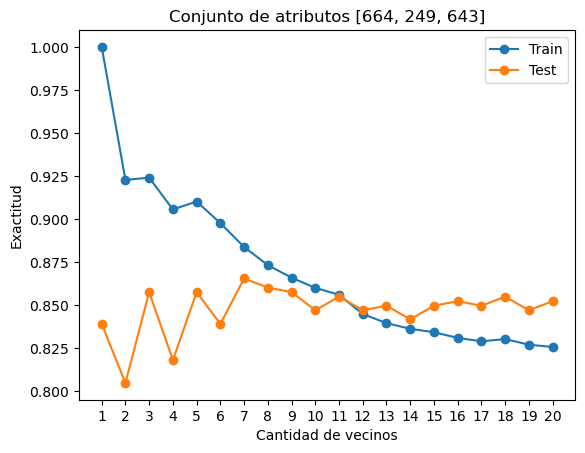

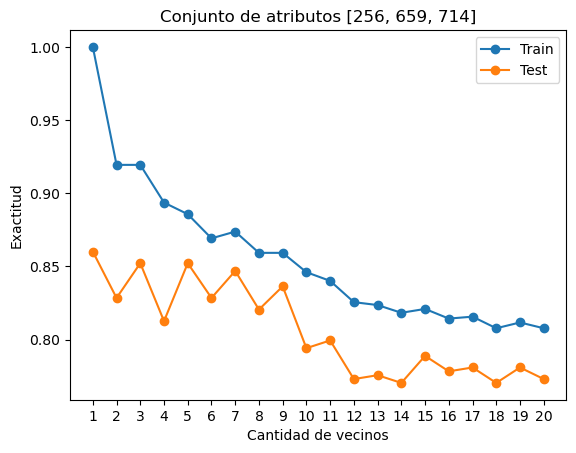

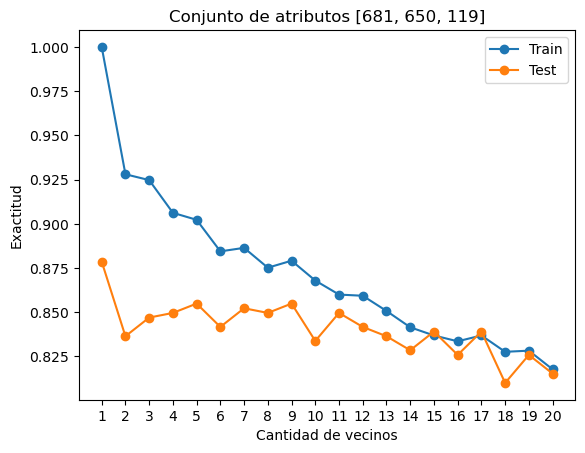

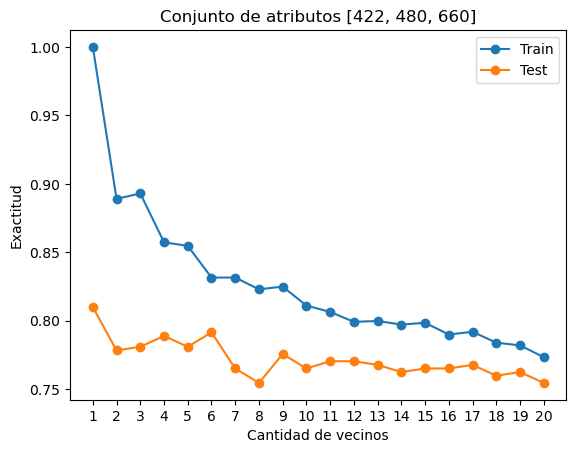

In [12]:
#%% EJERCICIO 2 - buscamos qué atributos son mejores para entrenar un modelo predictivo, método 1

# Probamos el modelo para distintos sets de 3 atributos del conjunto de entrenamiento

cant_combin = 4 # Cant de distintas combinaciones de atributos

vecinos = [i for i in range(1,21)] # lista con la variación de cant de vecinos

# Guardamos los scores para testing y training de cada combinación según
# la cantidad de vecinos en
acc_sets_train = [0]*cant_combin

acc_sets_test = [0]*cant_combin

# Generamos los conjuntos de a 3 atributos seleccionando éstos
# pseudo aleatoriamente
random.seed(seed = 3)

pos_atrib = [list(random.randint(0, 784, 3)) for i in range(cant_combin)]

for i in range(cant_combin):

    acc_sets_test[i] = [0]*len(vecinos) # cant de distintos vecinos

    acc_sets_train[i] = [0]*len(vecinos)

    for k in vecinos:

        # armamos el modelo con knn
        neigh = KNeighborsClassifier(n_neighbors = k)

        # ajustamos el modelo con los datos de los atributos
        neigh.fit(np.transpose(np.array([X_train[ : , a] for a in pos_atrib[i]])), Y_train)

        # calculamos el score para el modelo sobre los datasets de test y train
        prediccion_train = neigh.predict(np.transpose(np.array([X_train[ : , a] for a in pos_atrib[i]])))
        acc_train = accuracy_score(Y_train, prediccion_train)
        prediccion_test = neigh.predict(np.transpose(np.array([X_test[ : , a] for a in pos_atrib[i]])))
        acc_test = accuracy_score(Y_test, prediccion_test)

        # guardamos los scores sobre los datos de test y train para luego compararlos
        acc_sets_train[i][k-1] = acc_train
        acc_sets_test[i][k-1] = acc_test

# Graficamos para cada el modelo de cada combinacion de atributos su score en los sets
# de testing y training

### primer gráf

fig0, ax0 = plt.subplots()

plt.plot(vecinos, acc_sets_train[0], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[0], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[0]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax0.set_xticks(vecinos)
ax0.legend()

### segundo gráf

fig1, ax1 = plt.subplots()

plt.plot(vecinos, acc_sets_train[1], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[1], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[1]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax1.set_xticks(vecinos)
ax1.legend()

### tercer gráf

fig2, ax2 = plt.subplots()

plt.plot(vecinos, acc_sets_train[2], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[2], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[2]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax2.set_xticks(vecinos)
ax2.legend()

### cuarto gráf

fig3, ax3 = plt.subplots()

plt.plot(vecinos, acc_sets_train[3], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[3], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[3]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax3.set_xticks(vecinos)
ax3.legend()

### Ahora vamos a repetir el proceso variando la cantidad de atributos
## Probamos con cant de atributos = 5

cant_combin = 4 # cant de distintas combinaciones de atributos

vecinos = [i for i in range(1,21)] # lista con la variación de cant de vecinos

# Guardamos los scores para testing y training de cada combinacion segun
# la cantidad de vecinos
acc_sets_train = [0]*cant_combin

acc_sets_test = [0]*cant_combin


# Generamos los conjuntos de a 5 atributos seleccionando éstos
# pseudo aleatoriamente
random.seed(seed = 777)

pos_atrib = [list(random.randint(0, 784, 5)) for i in range(cant_combin)]

for i in range(cant_combin):

    acc_sets_test[i] = [0]*len(vecinos) # cant de distintos vecinos

    acc_sets_train[i] = [0]*len(vecinos)

    for k in vecinos:

        # armamos el modelo con knn
        neigh = KNeighborsClassifier(n_neighbors = k)

        # ajustamos el modelo con los datos de los atributos
        neigh.fit(np.transpose(np.array([X_train[ : , a] for a in pos_atrib[i]])), Y_train)

        # calculamos el score para el modelo sobre los datasets de test y train
        prediccion_train = neigh.predict(np.transpose(np.array([X_train[ : , a] for a in pos_atrib[i]])))
        acc_train = accuracy_score(Y_train, prediccion_train)
        prediccion_test = neigh.predict(np.transpose(np.array([X_test[ : , a] for a in pos_atrib[i]])))
        acc_test = accuracy_score(Y_test, prediccion_test)

        # guardamos los scores sobre los datos de test y train para luego compararlos
        acc_sets_train[i][k-1] = acc_train
        acc_sets_test[i][k-1] = acc_test

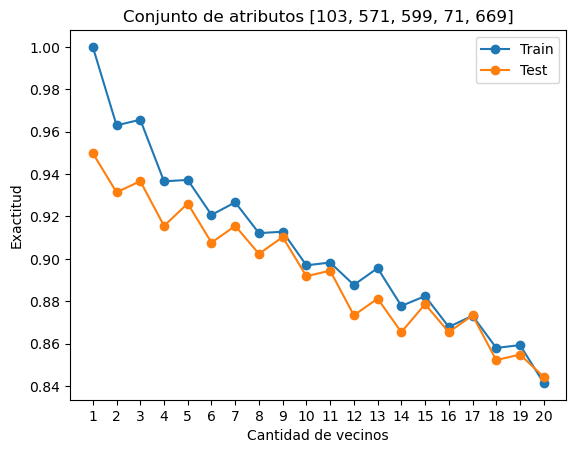

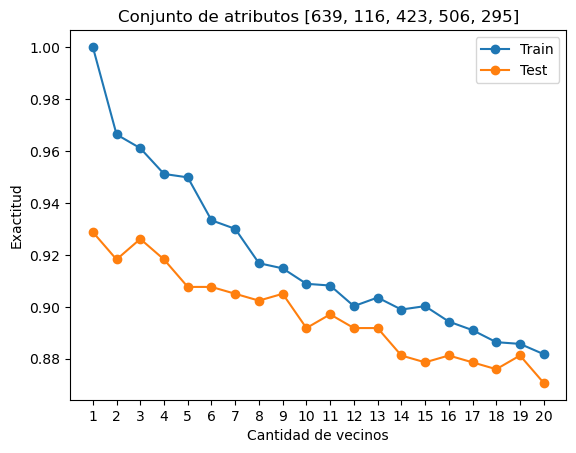

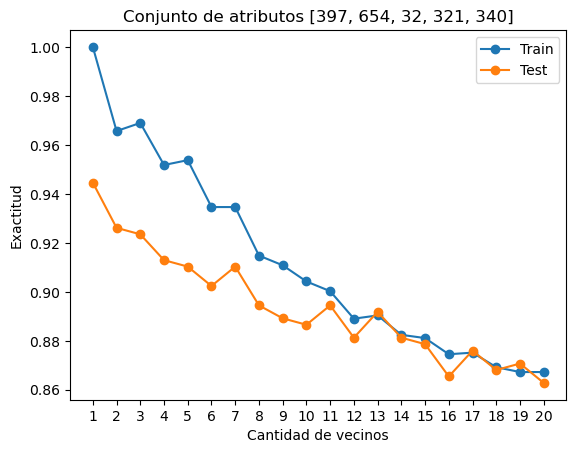

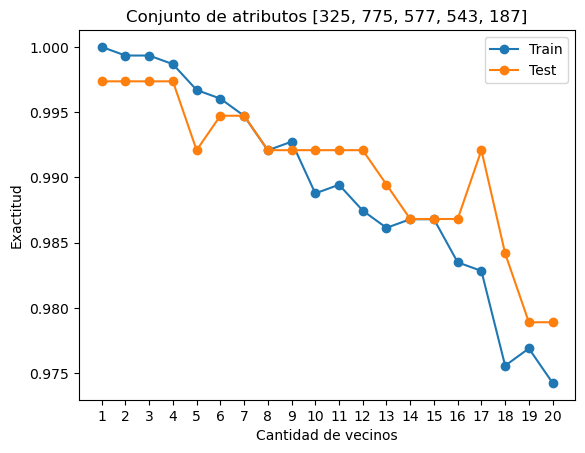

In [13]:
# Graficamos para cada el modelo de cada combinacion de atributos su score en los
# sets de testing y training

### primer gráf

fig4, ax4 = plt.subplots()

plt.plot(vecinos, acc_sets_train[0], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[0], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[0]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax4.set_xticks(vecinos)
ax4.legend()

### segundo gráf

fig5, ax5 = plt.subplots()

plt.plot(vecinos, acc_sets_train[1], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[1], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[1]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax5.set_xticks(vecinos)
ax5.legend()

### tercer gráf

fig6, ax6 = plt.subplots()

plt.plot(vecinos, acc_sets_train[2], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[2], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[2]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax6.set_xticks(vecinos)
ax6.legend()

### cuarto gráf

fig7, ax7 = plt.subplots()

plt.plot(vecinos, acc_sets_train[3], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[3], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[3]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax7.set_xticks(vecinos)
ax7.legend()

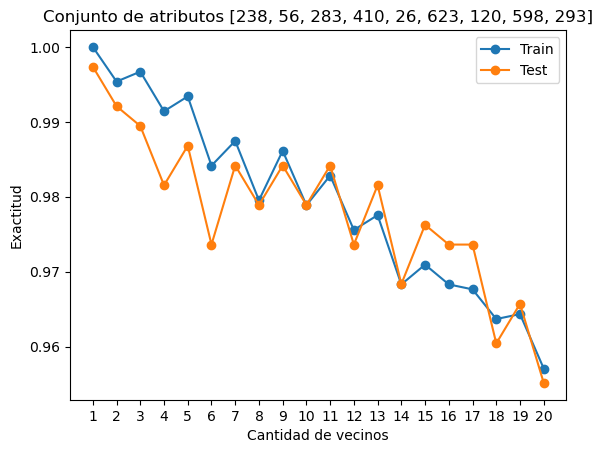

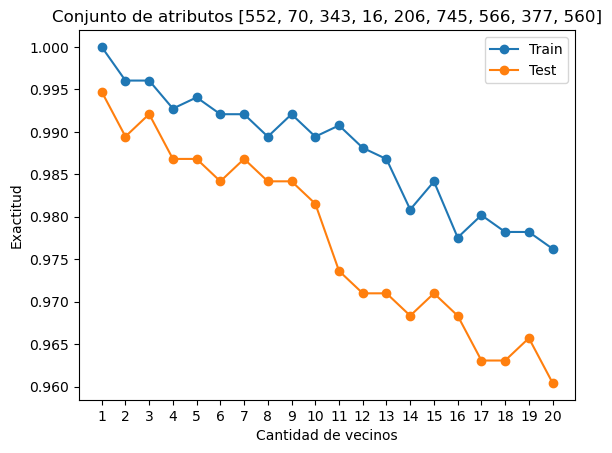

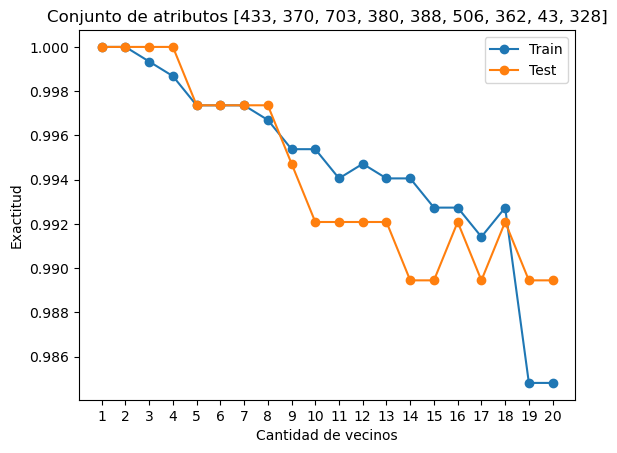

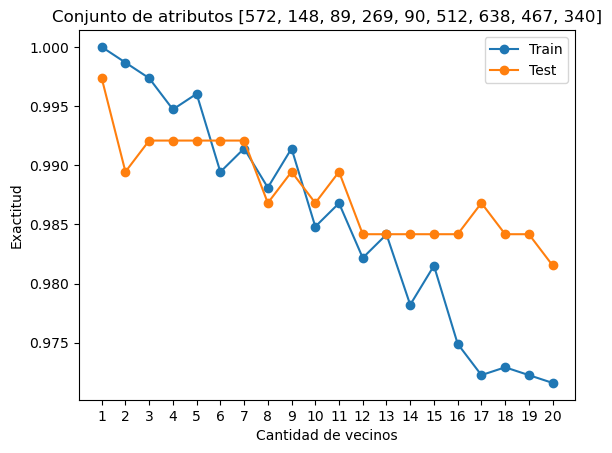

In [14]:
### Por último probamos con cant de atributos = 9

cant_combin = 4 # cant de distintas combinaciones de atributos

vecinos = [i for i in range(1,21)] # lista con la variación de cant de vecinos

# Guardamos los scores para testing y training de cada combinacion segun
# la cantidad de vecinos
acc_sets_train = [0]*cant_combin

acc_sets_test = [0]*cant_combin


# Generamos los conjuntos de a 9 atributos seleccionando éstos
# pseudo aleatoriamente
random.seed(seed = 423)

pos_atrib = [list(random.randint(0, 784, 9)) for i in range(cant_combin)]

for i in range(cant_combin):

    acc_sets_test[i] = [0]*len(vecinos) # cant de distintos vecinos

    acc_sets_train[i] = [0]*len(vecinos)

    for k in vecinos:

        # armamos el modelo con knn
        neigh = KNeighborsClassifier(n_neighbors = k)

        # ajustamos el modelo con los datos de los atributos
        neigh.fit(np.transpose(np.array([X_train[ : , a] for a in pos_atrib[i]])), Y_train)

        # calculamos el score para el modelo sobre los datasets de test y train
        prediccion_train = neigh.predict(np.transpose(np.array([X_train[ : , a] for a in pos_atrib[i]])))
        acc_train = accuracy_score(Y_train, prediccion_train)
        prediccion_test = neigh.predict(np.transpose(np.array([X_test[ : , a] for a in pos_atrib[i]])))
        acc_test = accuracy_score(Y_test, prediccion_test)

        # guardamos los scores sobre los datos de test y train para luego compararlos
        acc_sets_train[i][k-1] = acc_train
        acc_sets_test[i][k-1] = acc_test

# Graficamos para cada el modelo de cada combinacion de atributos su score en los sets de testing y training

### primer gráf

fig8, ax8 = plt.subplots()

plt.plot(vecinos, acc_sets_train[0], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[0], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[0]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax8.set_xticks(vecinos)
ax8.legend()

### segundo gráf

fig9, ax9 = plt.subplots()

plt.plot(vecinos, acc_sets_train[1], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[1], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[1]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax9.set_xticks(vecinos)
ax9.legend()

### tercer gráf

fig10, ax10 = plt.subplots()

plt.plot(vecinos, acc_sets_train[2], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[2], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[2]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax10.set_xticks(vecinos)
ax10.legend()

### cuarto gráf

fig11, ax11 = plt.subplots()

plt.plot(vecinos, acc_sets_train[3], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[3], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[3]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax11.set_xticks(vecinos)
ax11.legend()

# Si observamos los gráficos para la distinta cantidad de atributos podemos
# notar que mientras que al principio el set de training da mejores resultados
# que el set de testing, cuando generamos modelos con más atributos (como 5 o 9)
# la performance de estos sobre los datos de test es cada vez más similar a la
# de los datos de train

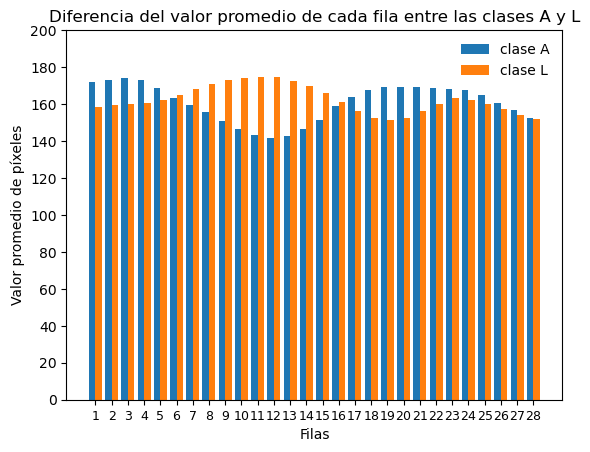

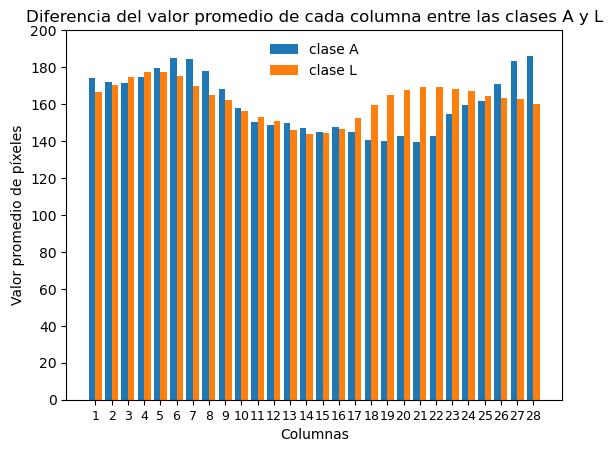

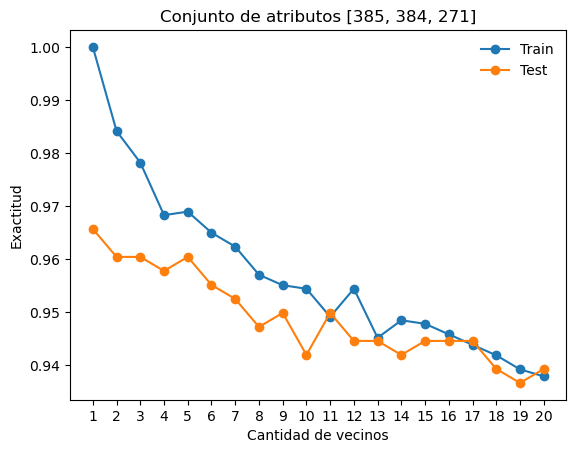

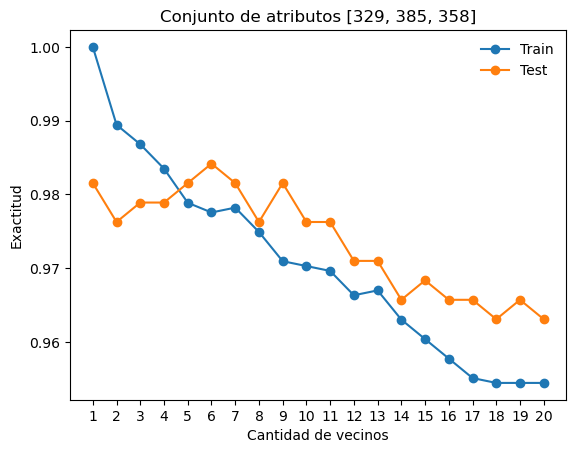

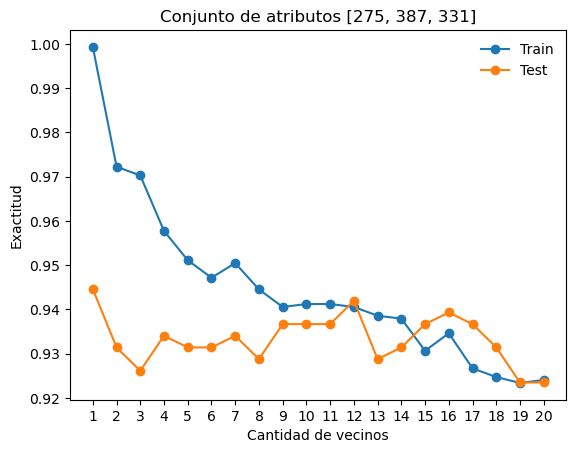

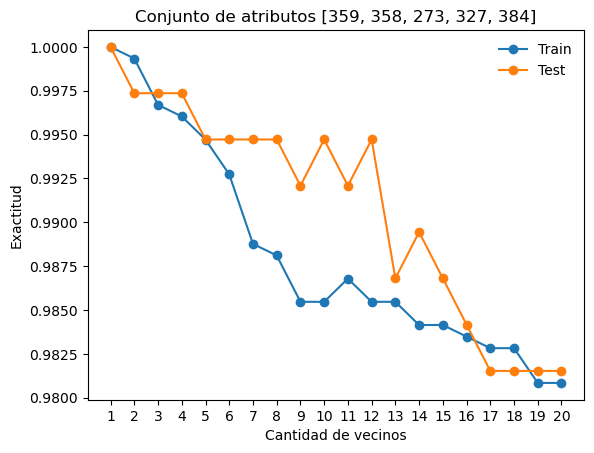

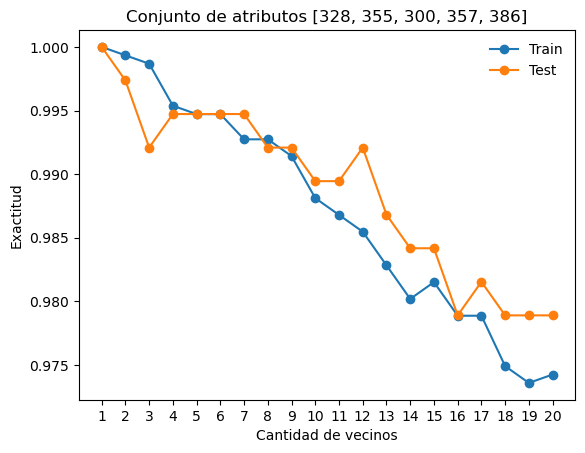

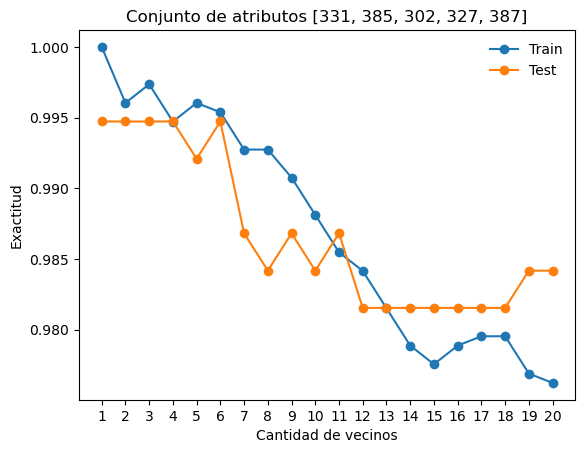

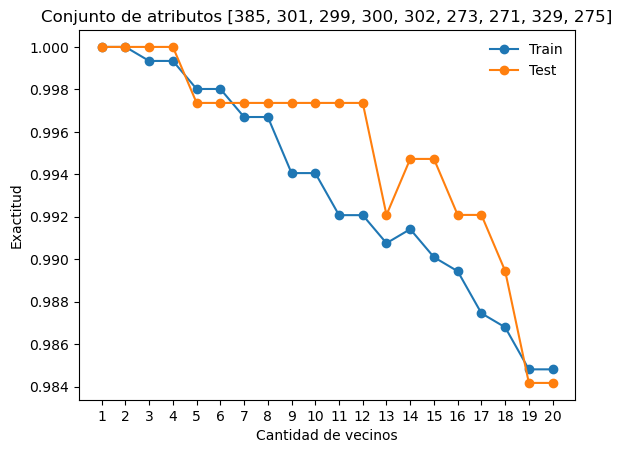

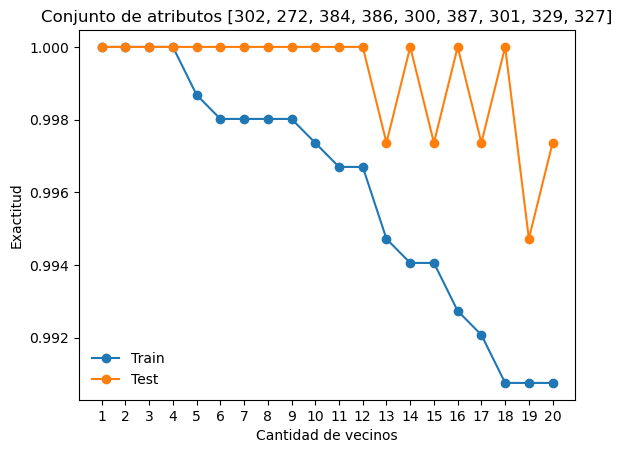

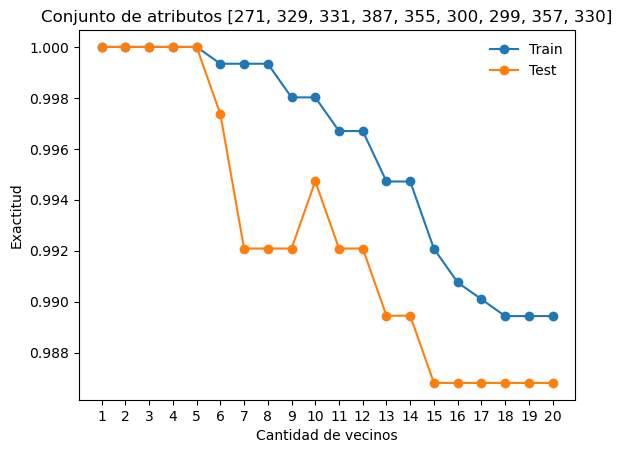

In [15]:
#%% EJERCICIO 2 - buscamos los mejores atributos para entrenar el modelo - método 2

# Ahora probamos eligiendo los atributos que creamos que más facilitan la
# diferenciación entre la A y la L

# para esto miramos los promedios de valores en filas y en columnas
# para cada letra y vemos qué partes de la imagen tiene más o menos diferencias

# voy a tomar 100 imagenes de cada clase

## uso las imágenes más representativas para la clase L y la clase A que se
## calcularon previamente en el ejercicio 1 para calcular promedios de filas y
## columnas de cada clase

prom_clase_A = np.array(promedios_por_clase[0]).reshape(28, 28)

prom_fil_A = [np.mean(prom_clase_A[i]) for i in range(28)]


prom_clase_L = np.array(promedios_por_clase[11]).reshape(28, 28)

prom_fil_L = [np.mean(prom_clase_L[i]) for i in range(28)]


fig_fil, ax_fil = plt.subplots()
ax_fil.bar(x = np.arange(1,29) - 0.2, height = prom_fil_A, width = 0.4,
           label = 'clase A')
ax_fil.bar(x = np.arange(1,29) + 0.2, height = prom_fil_L, width = 0.4,
           label= 'clase L')
rcParams['legend.frameon'] = False
plt.xticks(np.arange(1,29), size = 9)
plt.yticks(np.linspace(0,200, 11, dtype = int))
ax_fil.set_title('Diferencia del valor promedio de cada fila entre las clases A y L')
ax_fil.set_xlabel('Filas')
ax_fil.set_ylabel('Valor promedio de píxeles')
plt.legend()
plt.show()

# puedo observar por el gráfico que las filas con mayor diferencia entre el 
# promedio de los valores de sus pixeles van de la 9 a la 13, es decir, si 
# asumimos que las filas empiezan arriba con la fila 1 y terminan abajo con la
# fila 28, los pixeles de clase A y clase L tienden a diferir más en la mitad
# superior de las imágenes

# ahora miro las columnas

prom_col_A = [np.mean(prom_clase_A.T[i]) for i in range(28)]

prom_col_L = [np.mean(prom_clase_L.T[i]) for i in range(28)]

fig_col, ax_col = plt.subplots()
ax_col.bar(x = np.arange(1,29) - 0.2, height = prom_col_A, width = 0.4, 
           label = 'clase A')
ax_col.bar(x = np.arange(1,29) + 0.2, height = prom_col_L, width = 0.4,
           label = 'clase L')
rcParams['legend.frameon'] = False
ax_col.set_title('Diferencia del valor promedio de cada columna entre las clases A y L')
ax_col.set_xlabel('Columnas')
ax_col.set_ylabel('Valor promedio de píxeles')
plt.xticks(np.arange(1,29), size = 9)
plt.yticks(np.linspace(0,200, 11, dtype = int))
plt.legend()
plt.show()

# de este gráfico puedo ver que las columnas donde más difieren los valores de 
# las imagenes de clases A y L entre sí en general suele ser entre la 18 y la 22
# por lo que si asumimos que las columnas comienzan con la 1 en la izquierda 
# y la 28 en el extremo derecho, los pixeles suelen ser más distintos en la 
# mitad derecha de las imágenes.


# ahora probaremos ajustar un modelo tomando atributos que se encuentren en 
# las columnas y filas mencionadas previamente

cant_combin = 3
vecinos = [i for i in range(1,21)]
matriz_num = np.arange(1,785).reshape(28,28)
posiciones = matriz_num[9 : 14, 18 : 23].flatten().tolist()

# generamos distintos modelos para grupos de 3 atributos

random.seed(4)
pos_atrib = [random.choice(posiciones, size = 3, replace = False).tolist() for i in range(cant_combin)]


for i in range(cant_combin):

    acc_sets_test[i] = [0]*len(vecinos) # cant de distintos vecinos

    acc_sets_train[i] = [0]*len(vecinos)

    for k in vecinos:

        # armamos el modelo con knn
        neigh = KNeighborsClassifier(n_neighbors = k)

        # ajustamos el modelo con los datos de los atributos
        neigh.fit(np.transpose(np.array([X_train[ : , a] for a in pos_atrib[i]])), Y_train)

        # calculamos el score para el modelo sobre los datasets de test y train
        prediccion_train = neigh.predict(np.transpose(np.array([X_train[ : , a] for a in pos_atrib[i]])))
        acc_train = accuracy_score(Y_train, prediccion_train)
        prediccion_test = neigh.predict(np.transpose(np.array([X_test[ : , a] for a in pos_atrib[i]])))
        acc_test = accuracy_score(Y_test, prediccion_test)

        # guardamos los scores sobre los datos de test y train para luego compararlos
        acc_sets_train[i][k-1] = acc_train
        acc_sets_test[i][k-1] = acc_test

# grafico los resultados para los atributos seleccionados según la cantidad de
# vecinos del modelo knn

fig12, ax12 = plt.subplots()

plt.plot(vecinos, acc_sets_train[0], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[0], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[0]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax12.set_xticks(vecinos)
ax12.legend()


fig13, ax13 = plt.subplots()

plt.plot(vecinos, acc_sets_train[1], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[1], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[1]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax13.set_xticks(vecinos)
ax13.legend()


fig14, ax14 = plt.subplots()

plt.plot(vecinos, acc_sets_train[2], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[2], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[2]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax14.set_xticks(vecinos)
ax14.legend()

## ahora pruebo tomando 5 atributos del grupo que considero útil

random.seed(5)

pos_atrib = [random.choice(posiciones, size = 5, replace = False).tolist() for i in range(cant_combin)]


for i in range(cant_combin):

    acc_sets_test[i] = [0]*len(vecinos) # cant de distintos vecinos

    acc_sets_train[i] = [0]*len(vecinos)

    for k in vecinos:

        # armamos el modelo con knn
        neigh = KNeighborsClassifier(n_neighbors = k)

        # ajustamos el modelo con los datos de los atributos
        neigh.fit(np.transpose(np.array([X_train[ : , a] for a in pos_atrib[i]])), Y_train)

        # calculamos el score para el modelo sobre los datasets de test y train
        prediccion_train = neigh.predict(np.transpose(np.array([X_train[ : , a] for a in pos_atrib[i]])))
        acc_train = accuracy_score(Y_train, prediccion_train)
        prediccion_test = neigh.predict(np.transpose(np.array([X_test[ : , a] for a in pos_atrib[i]])))
        acc_test = accuracy_score(Y_test, prediccion_test)

        # guardamos los scores sobre los datos de test y train para luego compararlos
        acc_sets_train[i][k-1] = acc_train
        acc_sets_test[i][k-1] = acc_test

# grafico los resultados para los atributos seleccionados según la cantidad de
# vecinos del modelo knn

fig15, ax15 = plt.subplots()

plt.plot(vecinos, acc_sets_train[0], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[0], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[0]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax15.set_xticks(vecinos)
ax15.legend()


fig16, ax16 = plt.subplots()

plt.plot(vecinos, acc_sets_train[1], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[1], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[1]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax16.set_xticks(vecinos)
ax16.legend()


fig17, ax17 = plt.subplots()

plt.plot(vecinos, acc_sets_train[2], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[2], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[2]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax17.set_xticks(vecinos)
ax17.legend()

### por último pruebo modelos de 9 atributos con los atributos dentro del grupo
##  mencionado previamente

random.seed(6)

pos_atrib = [random.choice(posiciones, size = 9, replace = False).tolist() for i in range(cant_combin)]


for i in range(cant_combin):

    acc_sets_test[i] = [0]*len(vecinos) # cant de distintos vecinos

    acc_sets_train[i] = [0]*len(vecinos)

    for k in vecinos:

        # armamos el modelo con knn
        neigh = KNeighborsClassifier(n_neighbors = k)

        # ajustamos el modelo con los datos de los atributos
        neigh.fit(np.transpose(np.array([X_train[ : , a] for a in pos_atrib[i]])), Y_train)

        # calculamos el score para el modelo sobre los datasets de test y train
        prediccion_train = neigh.predict(np.transpose(np.array([X_train[ : , a] for a in pos_atrib[i]])))
        acc_train = accuracy_score(Y_train, prediccion_train)
        prediccion_test = neigh.predict(np.transpose(np.array([X_test[ : , a] for a in pos_atrib[i]])))
        acc_test = accuracy_score(Y_test, prediccion_test)

        # guardamos los scores sobre los datos de test y train para luego compararlos
        acc_sets_train[i][k-1] = acc_train
        acc_sets_test[i][k-1] = acc_test



# grafico los resultados para los atributos seleccionados según la cantidad de
# vecinos del modelo knn

fig18, ax18 = plt.subplots()

plt.plot(vecinos, acc_sets_train[0], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[0], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[0]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax18.set_xticks(vecinos)
ax18.legend()


fig19, ax19 = plt.subplots()

plt.plot(vecinos, acc_sets_train[1], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[1], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[1]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax19.set_xticks(vecinos)
ax19.legend()


fig20, ax20 = plt.subplots()

plt.plot(vecinos, acc_sets_train[2], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[2], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[2]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax20.set_xticks(vecinos)
ax20.legend()


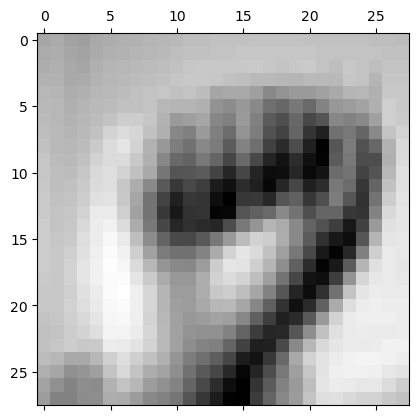

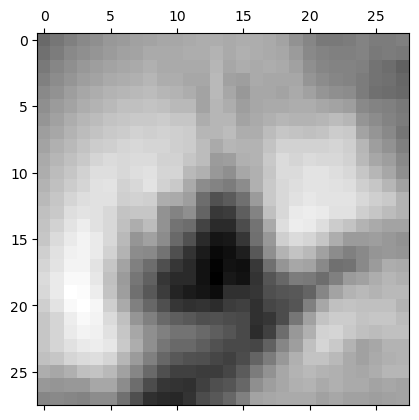

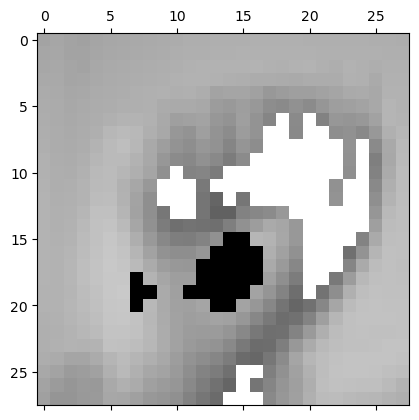

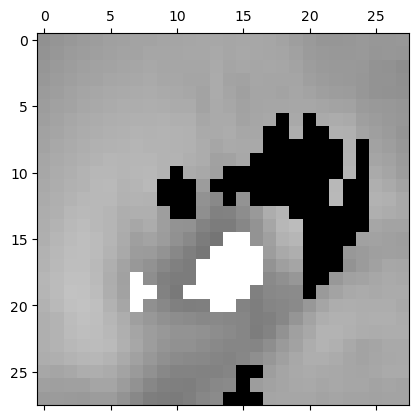

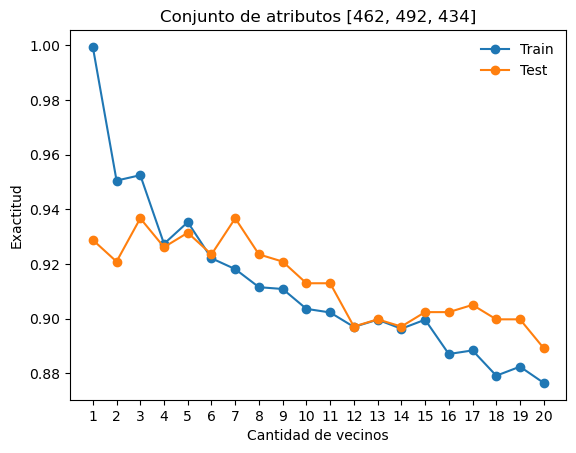

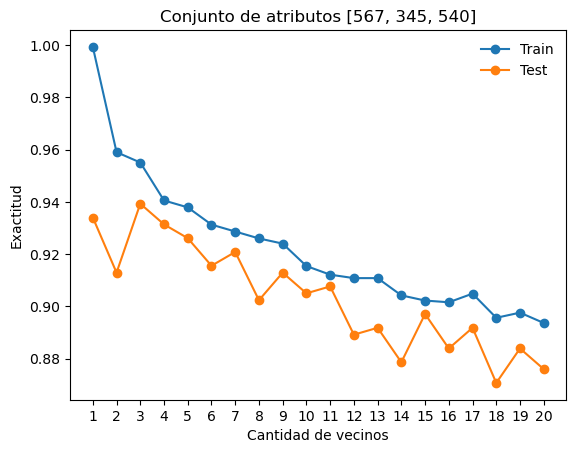

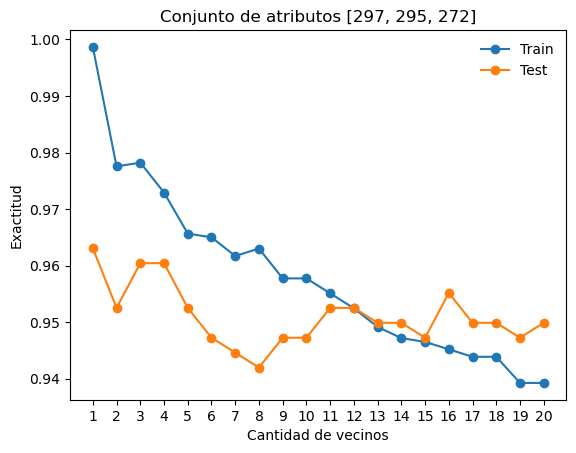

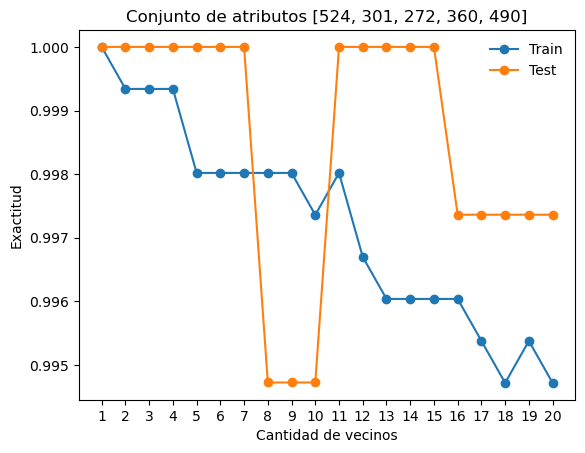

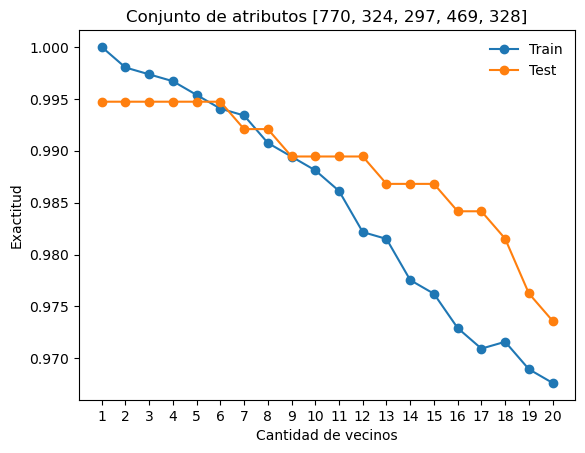

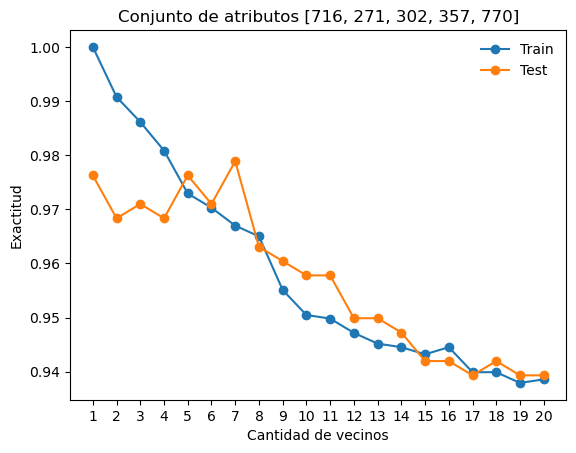

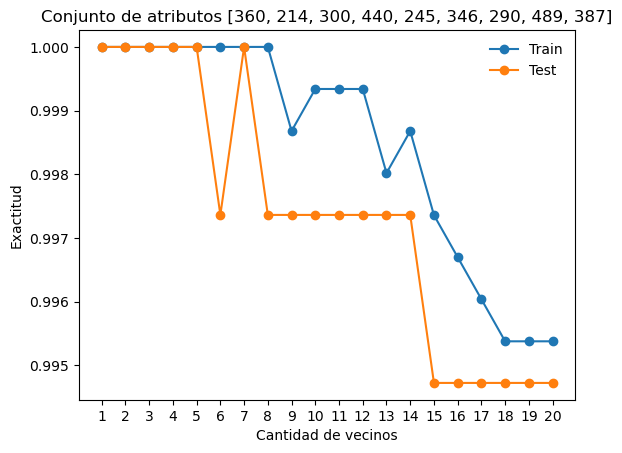

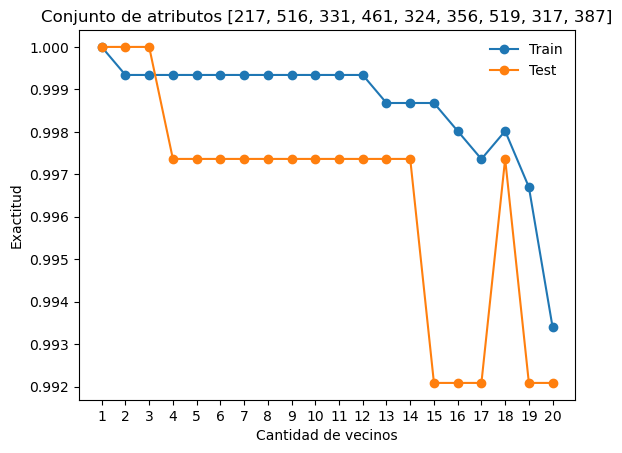

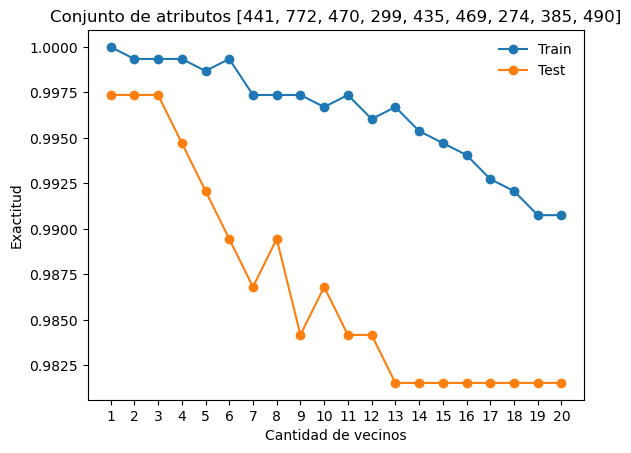

In [16]:
#%% EJERCICIO 2 - buscamos los mejores atributos para entrenar el modelo - método 3

### como tercer opción, podemos ver cuáles atributos resultan más críticos 
### para diferenciar las imágenes de la clase A de las de la clase L 
### restando las imágenes más representativas de cada clase y considerando los 
### atributos con mayor diferencia de la matriz resultante como posibles
### buenas elecciones de atributos para entrenar un modelo que sepa predecir
### si una imagen corresponde a la clase A o a la clase L


promedios_As = np.round(promedios_por_clase[0])
promedios_Ls = np.round(promedios_por_clase[11])

plt.matshow(promedios_As.reshape(28, 28), cmap = "gray")
plt.matshow(promedios_Ls.reshape(28, 28), cmap = "gray")

mod_diferencia = np.round(np.subtract(promedios_As, promedios_Ls)).astype(int)

# Como diferencia considerable para tener en cuenta consideramos que la diferencia en los pixeles entre ambas imágenes debe ser
# mayor a 55 para ser significativo. Luego nos quedamos con los pixeles de la diferencia que cumplan con esto:

diferencia_significativa = 40
indices_mayor_diferencia = [] # Pixeles donde promedios_As es más claro que promedios_Ls (más cerca de 255)
indices_menor_diferencia = [] # Pixeles donde promedios_As es más oscuro que promedios_Ls (más cerca de 0)
for i in range(0, len(mod_diferencia)):
  if abs(mod_diferencia[i]) > diferencia_significativa:
    if mod_diferencia[i] > 0:
      indices_mayor_diferencia.append(i)
    else:
      indices_menor_diferencia.append(i)



# Coloreamos los pixeles de la diferencia significativa en ambas imágenes donde promedios_As es más claro
for pixel in indices_mayor_diferencia:
  promedios_As[pixel] = 0
  promedios_Ls[pixel] = 255

# Coloreamos los pixeles de la diferencia significativa en ambas imágenes donde promedios_As es más oscuro
for pixel in indices_menor_diferencia:
  promedios_As[pixel] = 255
  promedios_Ls[pixel] = 0

# Forma de interpretar los gráficos:
# En negro se encuentran los puntos donde la clase de letra es más clara que la otra
# En blanco se encuentran los puntos donde la clase de letra es más oscura que la otra

plt.matshow(promedios_As.reshape(28, 28), cmap = "gray")
plt.matshow(promedios_Ls.reshape(28, 28), cmap = "gray")

# considerando los atributos cuyos valores promedio mayor diferencia tienen 
# entre las clases A y L, generamos y entrenamos modelos de knn con distintos k

#Probamos y graficamos fijando la cantidad de atributos = 3
random.seed(7)
cant_combin = 3
cant_atrib = 3
acc_sets_test, acc_sets_train = [list()]*cant_atrib, [list()]*cant_atrib

posiciones = [i for i in range(promedios_As.shape[0]) 
              if promedios_As[i] == 255 or promedios_As[i] == 0]

pos_atrib = [random.choice(posiciones, size = cant_atrib, replace = False).tolist() for i in range(cant_combin)]

for i in range(cant_combin):

    acc_sets_test[i] = [0]*len(vecinos) # cant de distintos vecinos

    acc_sets_train[i] = [0]*len(vecinos)

    for k in vecinos:

        # armamos el modelo con knn
        neigh = KNeighborsClassifier(n_neighbors = k)

        # ajustamos el modelo con los datos de los atributos
        neigh.fit(np.transpose(np.array([X_train[ : , a] for a in pos_atrib[i]])), Y_train)

        # calculamos el score para el modelo sobre los datasets de test y train
        prediccion_train = neigh.predict(np.transpose(np.array([X_train[ : , a] for a in pos_atrib[i]])))
        acc_train = accuracy_score(Y_train, prediccion_train)
        prediccion_test = neigh.predict(np.transpose(np.array([X_test[ : , a] for a in pos_atrib[i]])))
        acc_test = accuracy_score(Y_test, prediccion_test)

        # guardamos los scores sobre los datos de test y train para luego compararlos
        acc_sets_train[i][k-1] = acc_train
        acc_sets_test[i][k-1] = acc_test

fig21, ax21 = plt.subplots()

plt.plot(vecinos, acc_sets_train[0], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[0], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[0]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax21.set_xticks(vecinos)
ax21.legend()


fig22, ax22 = plt.subplots()

plt.plot(vecinos, acc_sets_train[1], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[1], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[1]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax22.set_xticks(vecinos)
ax22.legend()


fig23, ax23 = plt.subplots()

plt.plot(vecinos, acc_sets_train[2], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[2], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[2]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax23.set_xticks(vecinos)
ax23.legend()


#Probamos y graficamos fijando la cantidad de atributos = 5
random.seed(8)
cant_combin = 3
cant_atrib = 5
acc_sets_test, acc_sets_train = [list()]*cant_atrib, [list()]*cant_atrib

posiciones = [i for i in range(promedios_As.shape[0]) 
              if promedios_As[i] == 255 or promedios_As[i] == 0]

pos_atrib = [random.choice(posiciones, size = cant_atrib, replace = False).tolist() for i in range(cant_combin)]

for i in range(cant_combin):

    acc_sets_test[i] = [0]*len(vecinos) # cant de distintos vecinos

    acc_sets_train[i] = [0]*len(vecinos)

    for k in vecinos:

        # armamos el modelo con knn
        neigh = KNeighborsClassifier(n_neighbors = k)

        # ajustamos el modelo con los datos de los atributos
        neigh.fit(np.transpose(np.array([X_train[ : , a] for a in pos_atrib[i]])), Y_train)

        # calculamos el score para el modelo sobre los datasets de test y train
        prediccion_train = neigh.predict(np.transpose(np.array([X_train[ : , a] for a in pos_atrib[i]])))
        acc_train = accuracy_score(Y_train, prediccion_train)
        prediccion_test = neigh.predict(np.transpose(np.array([X_test[ : , a] for a in pos_atrib[i]])))
        acc_test = accuracy_score(Y_test, prediccion_test)

        # guardamos los scores sobre los datos de test y train para luego compararlos
        acc_sets_train[i][k-1] = acc_train
        acc_sets_test[i][k-1] = acc_test

fig24, ax24 = plt.subplots()

plt.plot(vecinos, acc_sets_train[0], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[0], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[0]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax24.set_xticks(vecinos)
ax24.legend()


fig25, ax25 = plt.subplots()

plt.plot(vecinos, acc_sets_train[1], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[1], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[1]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax25.set_xticks(vecinos)
ax25.legend()


fig26, ax26 = plt.subplots()

plt.plot(vecinos, acc_sets_train[2], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[2], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[2]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax26.set_xticks(vecinos)
ax26.legend()

#Probamos y graficamos fijando la cantidad de atributos = 9
random.seed(9)
cant_combin = 3
cant_atrib = 9
acc_sets_test, acc_sets_train = [list()]*cant_atrib, [list()]*cant_atrib

posiciones = [i for i in range(promedios_As.shape[0]) 
              if promedios_As[i] == 255 or promedios_As[i] == 0]

pos_atrib = [random.choice(posiciones, size = cant_atrib, replace = False).tolist() for i in range(cant_combin)]

for i in range(cant_combin):

    acc_sets_test[i] = [0]*len(vecinos) # cant de distintos vecinos

    acc_sets_train[i] = [0]*len(vecinos)

    for k in vecinos:

        # armamos el modelo con knn
        neigh = KNeighborsClassifier(n_neighbors = k)

        # ajustamos el modelo con los datos de los atributos
        neigh.fit(np.transpose(np.array([X_train[ : , a] for a in pos_atrib[i]])), Y_train)

        # calculamos el score para el modelo sobre los datasets de test y train
        prediccion_train = neigh.predict(np.transpose(np.array([X_train[ : , a] for a in pos_atrib[i]])))
        acc_train = accuracy_score(Y_train, prediccion_train)
        prediccion_test = neigh.predict(np.transpose(np.array([X_test[ : , a] for a in pos_atrib[i]])))
        acc_test = accuracy_score(Y_test, prediccion_test)

        # guardamos los scores sobre los datos de test y train para luego compararlos
        acc_sets_train[i][k-1] = acc_train
        acc_sets_test[i][k-1] = acc_test

fig27, ax27 = plt.subplots()

plt.plot(vecinos, acc_sets_train[0], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[0], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[0]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax27.set_xticks(vecinos)
ax27.legend()


fig28, ax28 = plt.subplots()

plt.plot(vecinos, acc_sets_train[1], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[1], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[1]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax28.set_xticks(vecinos)
ax28.legend()


fig29, ax29 = plt.subplots()

plt.plot(vecinos, acc_sets_train[2], marker = 'o',
         linestyle = '-', label = 'Train')
plt.plot(vecinos, acc_sets_test[2], marker = 'o',
         linestyle = '-', label = 'Test')
plt.title('Conjunto de atributos ' + str(pos_atrib[2]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Exactitud')
ax29.set_xticks(vecinos)
ax29.legend()


In [17]:
#%% EJERCICIO 2 - elegimos el mejor modelo y lo evaluamos con los datos de EVAL

# luego de probar distintos métodos de obtener los atributos óptimos para entre
# nar el modelo, decidimos que los datos que mejor ajustan el modelo se consiguen
# con el método 3, que resta los promedios de cada pixel de las imagenes de cada
# clase para obtener los atributos con mayor diferencia entre la L y la A.
# particularmente, si se toman los atributos [716, 271, 302, 357, 770] con un
# k = 6 (como se ve en la figura 26) se obtiene un modelo que tiene una exactitud
# muy similar para los datos de train como los de test (exactitud ~= 0.97)

# a continuación, evaluamos el modelo con los datos de evaluación 

# primero recreamos el modelo con los atributos y la cantidad de vecinos indicada
# previamente

neigh = KNeighborsClassifier(n_neighbors = 6)

# ajustamos el modelo con los datos de los atributos
neigh.fit(np.transpose(np.array([X_train[ : , a] for a in [716, 271, 302, 357, 770]])), Y_train)

# calculamos la exactitud del modelo con el set de evalución

prediccion_eval = neigh.predict(np.transpose(np.array([X_eval[ : , a] for a in [716, 271, 302, 357, 770]])))
acc_eval = accuracy_score(Y_eval, prediccion_eval)

print('El modelo que elegimos devolvió una exactitud de ' + str(round(acc_eval, 3)) + ' sobre los datos de evaluación.')

# consideramos que, si bien la performance del modelo es más baja con los datos
# nuevos, se puede considerar que es bueno prediciendo con datos buenos.

El modelo que elegimos devolvió una exactitud de 0.941 sobre los datos de evaluación.


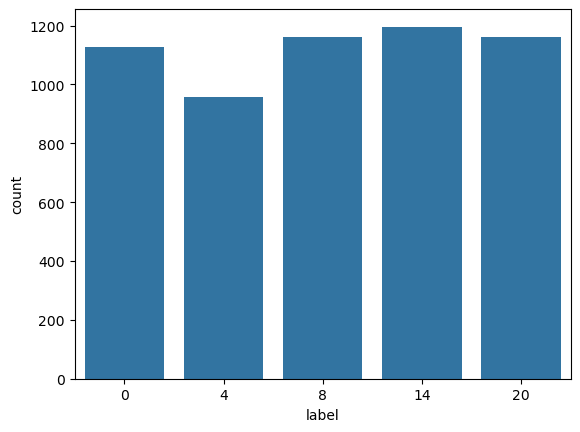

In [18]:
# EJERCICIO 3 

# Cargamos los datos y ordenamos las fotos según su letra
letras = pd.read_csv('sign_mnist_train.csv')

letras = letras.sort_values('label', ascending = True)

# creamos un df nuevo que tiene solo las fotos que corresponden a las vocales
letras_ej3 = letras.query('label == 0 or label == 4 or label == 8 or label == 14 or label == 20')
# analizamos si la distribución de clases es similar
letras_ej3['label'].value_counts().sort_index()

distribucion = sns.countplot(x = 'label', data = letras_ej3)
# todas tienen más o menos la misma cantidad menos la e que tiene más o menos
# 200 imágenes menos, pero cada letra representa alrededor del 20% de los datos


# armamos el conjunto de entrenamiento y el de evaluación
# separamos un treinta por ciento de muestras para la evaluación
letras_ej3 = letras_ej3.values

X = letras_ej3[ : ,1:]
Y = letras_ej3[ : , 0]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state = 43)

# Separamos los datos de desarrollo en conjuntos de train y test
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, Y_train, test_size = 0.3)

profundidad = [ 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 ]
exactitud_train = [0]*len(profundidad)
exactitud_test = [0]*len(profundidad)
# armamos arboles de decisión variando su profundidad
for i in range(len(profundidad)):
    arbol = DecisionTreeClassifier( max_depth = profundidad[i] )

    arbol.fit(X_train, Y_train)

    # guardo la exactitud del modelo
    prediccion_test = arbol.predict(X_test)
    exactitud_test[i] = accuracy_score(Y_test, prediccion_test)
    prediccion_train = arbol.predict(X_train)
    exactitud_train[i] = accuracy_score(Y_train, prediccion_train)

El primer modelo tiene una precisión de 0.792 y un recall de 0.773
El segundo modelo tiene una precisión de 0.83 y un recall de 0.818
El tercer modelo tiene una precisión de 0.872 y un recall de 0.862


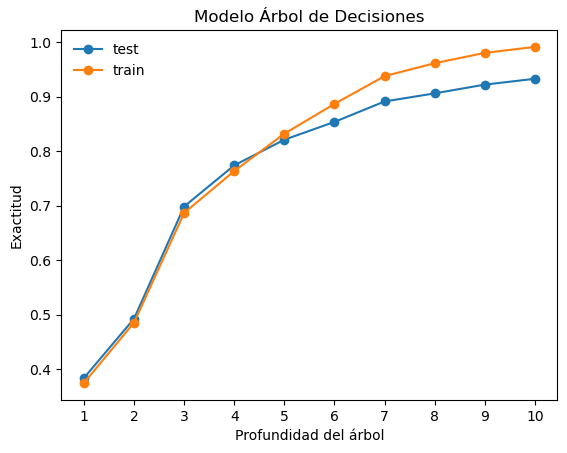

In [22]:
# Visualizamos la exactitud del modelo según la profundidad del árbol
fig_arb, ax_arb = plt.subplots()
plt.plot(profundidad, exactitud_test, marker = "o", linestyle = "-",
         label = 'test')
plt.plot(profundidad, exactitud_train, marker = "o", linestyle = "-",
         label = 'train')
plt.title('Modelo Árbol de Decisiones')
plt.xlabel('Profundidad del árbol')
plt.ylabel('Exactitud')
ax_arb.set_xticks(profundidad)
ax_arb.legend()


# Observamos de este gráfico que la performance del arbol es similar entre los
# datos de train y testing para la altura = {1, 2, 3, 4, 5, 6} sin embargo
# para las alturas 1, 2 y 3 el score es muy bajo, por lo que el modelo tiende
# a subajustar para esos valores

# a partir de la altura 7 el score sobre los datos de training y el score
# sobre los datos de testing se alejan, por lo que a partir de esa profundidad
# el modelo tiende a sobre ajustar


# Declaramos los 10 folds para evaluar los modelos

skf = StratifiedKFold(n_splits=10, shuffle = True, random_state = 13)

modelos = [0]*3 # cant de modelos de árboles que voy a generar

scores_modelos = [0]*3

# Armamos los arboles con profundidad = {4, 5, 6} para evaluar con
# k-folding cross-validation

for i in range(1,4):
    modelos[i - 1] = DecisionTreeClassifier(max_depth = 3 + i)
    modelos[i - 1].fit(X_train, Y_train)
    scores_modelos[i - 1] = cross_val_score(modelos[i - 1], X_train, Y_train, cv = skf)

precision = [0]*3

recall = [0]*3

for j in range(3):
    prediccion = modelos[j].predict(X_test)
    precision[j] = precision_score(Y_test, prediccion, average = 'macro' )
    recall[j] = recall_score(Y_test, prediccion, average = 'macro' )

print("El primer modelo tiene una precisión de " + str(round(precision[0], 3)) + " y un recall de " + str(round(recall[0], 3)))
print("El segundo modelo tiene una precisión de " + str(round(precision[1], 3)) + " y un recall de " + str(round(recall[1], 3)))
print("El tercer modelo tiene una precisión de " + str(round(precision[2], 3)) + " y un recall de " + str(round(recall[2], 3)))

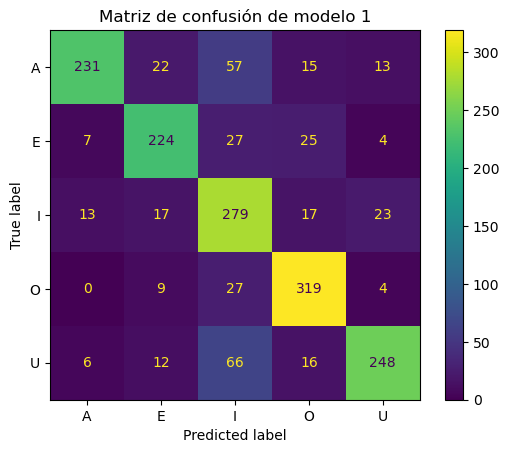

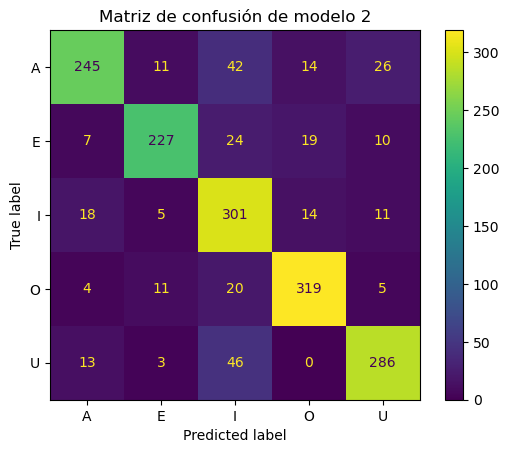

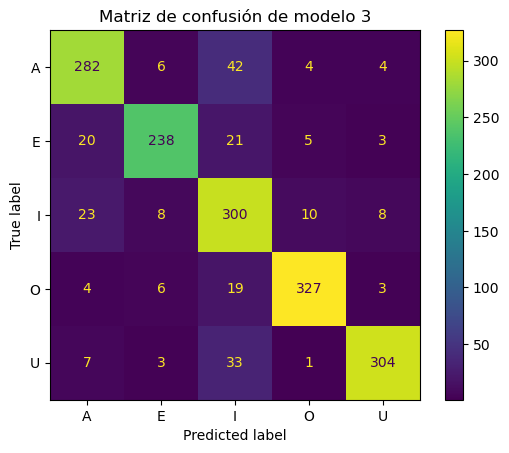

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (5).

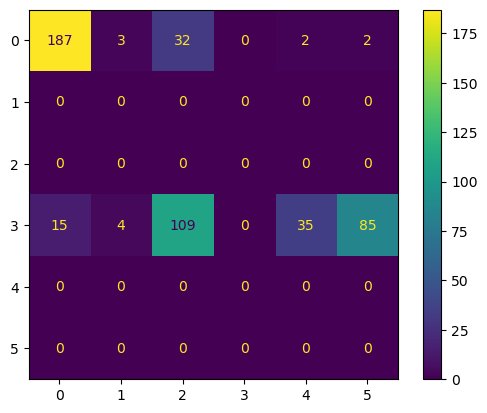

In [36]:
# Matrices de confusión

matriz_conf_1 = confusion_matrix(Y_test, modelos[0].predict(X_test))

cm_display = ConfusionMatrixDisplay(confusion_matrix = matriz_conf_1, display_labels = ['A','E','I','O','U'])

cm_display.plot()
plt.title('Matriz de confusión de modelo 1')
plt.show()

matriz_conf_2 = confusion_matrix(Y_test, modelos[1].predict(X_test))

cm_display = ConfusionMatrixDisplay(confusion_matrix = matriz_conf_2, display_labels = ['A','E','I','O','U'])

cm_display.plot()
plt.title('Matriz de confusión de modelo 2')
plt.show()

matriz_conf_3 = confusion_matrix(Y_test, modelos[2].predict(X_test))

cm_display = ConfusionMatrixDisplay(confusion_matrix = matriz_conf_3, display_labels = ['A','E','I','O','U'])

cm_display.plot()
plt.title('Matriz de confusión de modelo 3')
plt.show()

# teniendo en cuenta la precision, el recall y las matrices de confusion se puede
# concluir que el mejor modelo es el tercero.

# dado que elegimos que el mejor modelo para distinguir qué vocal está siendo
# señalizada en una imagen dada es el tercero, lo evaluamos con el conjunto EVAL
prediccion_modfinal = modelos[2].predict(X_eval)

precision_modfinal = precision_score(Y_eval, prediccion_modfinal, average = 'macro', zero_division=1)

recall_modfinal = recall_score(Y_eval, prediccion_modfinal, average = 'macro', zero_division=1)

matriz_conf_modfinal = confusion_matrix(Y_eval, prediccion_modfinal)

cm_display = ConfusionMatrixDisplay(confusion_matrix = matriz_conf_modfinal, display_labels=['A','E','I','O','U'])

cm_display.plot()
plt.title('Matriz de confusión del modelo final')
plt.show()


print('El modelo final fue evaluado con el conjunto de datos de EVAL y obtuvo un recall = ' + str(round(recall_modfinal, 3)) + ' y una precisión = ' + str(round(precision_modfinal, 3)) +'.')